# Linear models: Support Vector Machines (SVM)

In this notebook we are going to explore linear models and Support Vector Machines (SVM in short).

Let's first import the required packages.

In [1]:
# -- put here your ID number (numero di matricola)
ID_number = 7

from sklearn import datasets, preprocessing, linear_model, svm
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

## SVM for linearly separable data

Let's start by creating a simple linearly separable dataset for binary classification, where the instance space is $\mathcal{X} =\mathbb{R}^2$ (so that we can visualize it). Just to make things easier, we are going to rescale it too.

In [2]:
X, y = datasets.make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state=ID_number)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

The following code plots the dataset, it is useful for later parts too.

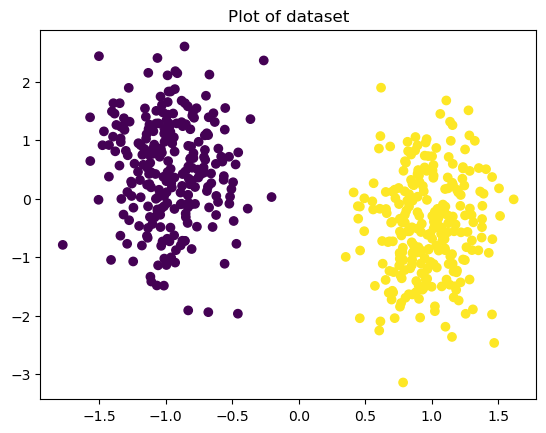

In [3]:
plt.title("Plot of dataset")
plt.scatter(X[:, 0], X[:, 1], c=y);

Now let's run the perceptron, using $\texttt{linear\_model.Perceptron(...)}$ from sklearn. WE fix the number of iterations to 100 so that it runs quickly (since we have a pretty simple to classifiy and linearly separable dataset) , and $\texttt{random\_state=10}$.

What do we expect in terms of training error? 

In [4]:
from sklearn.linear_model import Perceptron

# -- create a perceptron classifier
model_perceptron_1 = Perceptron(random_state = ID_number, tol=1e-3, verbose=1)

# -- Train the model
model_perceptron_1.fit(X, y)

# -- Get the training error as 1 - score()
training_error = 1.0 - model_perceptron_1.score(X, y)

# -- Print the training error
print("Training error: ", training_error)

-- Epoch 1
Norm: 1.91, NNZs: 2, Bias: 0.000000, T: 500, Avg. loss: 0.000433
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.91, NNZs: 2, Bias: 0.000000, T: 1000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.91, NNZs: 2, Bias: 0.000000, T: 1500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.91, NNZs: 2, Bias: 0.000000, T: 2000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.91, NNZs: 2, Bias: 0.000000, T: 2500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.91, NNZs: 2, Bias: 0.000000, T: 3000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
Training error:  0.0


The following code plots the *decision boundary* of a model and the training set. It is useful for later parts too.

In [5]:
# --- model_perceptron should be already trained
def plot_perceptron_boundaries(X, y, model_perceptron):

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
    ax = plt.gca()
    plt.title("Plot of perceptron decision boundary")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # -- create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model_perceptron.decision_function(xy).reshape(XX.shape)
    # -- plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=1, linestyles=['-']);

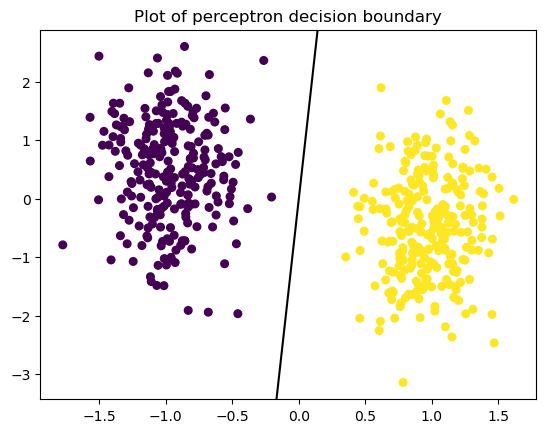

In [6]:
# -- let's print the decision boundaries of model_perceptron_1
plot_perceptron_boundaries(X, y, model_perceptron_1)

If we change the value of $\texttt{random\_state}$ in the perceptron, it will start from a different model. 

Let's run the perceptron with different values of $\texttt{random\_state}$. How will the solution compare to the above?

In [7]:
# -- create a perceptron classifier
model_perceptron_1 = Perceptron(random_state = ID_number * 11, tol=1e-3, verbose=1)

# -- Train the model
model_perceptron_1.fit(X, y)

# -- Get the training error as 1 - score()
training_error = 1.0 - model_perceptron_1.score(X, y)

# -- Print the training error
print("Training error: ", training_error)

-- Epoch 1
Norm: 2.02, NNZs: 2, Bias: 0.000000, T: 500, Avg. loss: 0.000034
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.02, NNZs: 2, Bias: 0.000000, T: 1000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.02, NNZs: 2, Bias: 0.000000, T: 1500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.02, NNZs: 2, Bias: 0.000000, T: 2000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 2, Bias: 0.000000, T: 2500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.02, NNZs: 2, Bias: 0.000000, T: 3000, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds
Training error:  0.0


What about the decision boundary? Let's plot it.

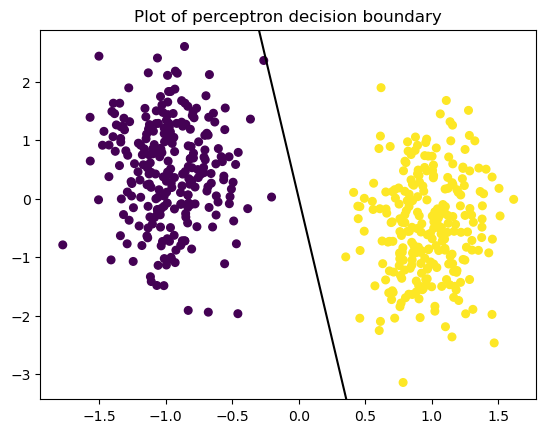

In [8]:
# -- let's print the decision boundaries of model_perceptron_1
plot_perceptron_boundaries(X, y, model_perceptron_1)

Which model is better? 

Is any of these the *best* choice?

The second one is worse than the first one! The margin in the second one is much smaller!

### Support Vector Machine (SVM)

Now, let's run the hard-SVM on the same data. To obtain (an almost) hard-SVM in sklearn, we can use $\texttt{svm.SVC(...)}$ with a very high value of the parameter $C$.

Note: the $C$ parameter used by $\texttt{svm.SVC(...)}$ method in sklearn is approximately equal to $1 / \lambda$, with respect to our use and definition of $\lambda$. 

In [9]:
# -- Creating a SVM model
from sklearn import svm

# -- TO COMPLETE 
# The C parameter: because in sklearn we do not have an implementation of the hard-svm, it's actually the
# soft-SVM with the slack that are fixed to 0 (i.e. the soft-SVM is the general approach).
# The C parameter is proportional to 1 \ lambda.
# C small => less importance to the training error but we get simpler solution
# C big => we care more about the training error (we want it to be zero) and less about the complexity
model_svm_1 = svm.SVC(kernel="linear", C=1e5)

# -- Train the model
model_svm_1.fit(X, y)

# -- Get the training error as 1 - score()
training_error = 1.0 - model_svm_1.score(X, y)

# -- Print the training error
print("Training error: ", training_error)

Training error:  0.0


Plot the SVM decision boundary.

In [10]:
# -- Code for plotting the decision boundary for svm
# -- svm_models must be a list of svm models
def plot_svm_boundaries(X, y, svm_models, show_sv=False, show_margin=False):

    plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
    ax = plt.gca()
    plt.title("Plot of SVM decision boundary")
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    palette = [f'C{i}' for i in range(len(svm_models))]
    handles = []

    for idx, svm in enumerate(svm_models):
    
        Z = svm.decision_function(xy).reshape(XX.shape)
        # plot decision boundary and margins
        if show_margin:
            ax.contour(XX, YY, Z, colors = palette[idx], levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
        else:
            ax.contour(XX, YY, Z, colors = palette[idx], levels=[0], alpha=1, linestyles=['-']);
        handles.append(Line2D([0], [0], label=f'SVM {idx+1}', color=palette[idx]))
        if show_sv:
            plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], color = palette[idx], marker='s', alpha=.85)

    ax.legend(handles = handles, loc = 'lower left')


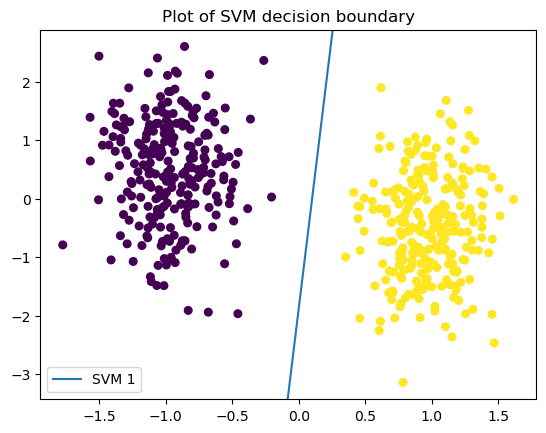

In [11]:
plot_svm_boundaries(X, y, [model_svm_1])

Let's see what the support vectors are. They are defined in attribute $\texttt{support\_vectors\_}$

In [12]:
# -- print the support vectors
print('Support Vectors:\n', model_svm_1.support_vectors_)

print('---')

# -- print dual coefficients
print('Dual Coefficients of Support Vectors:\n', model_svm_1.dual_coef_)

Support Vectors:
 [[-0.20498378  0.02693208]
 [ 0.35281708 -0.99697609]
 [ 0.41207829  0.10634759]]
---
Dual Coefficients of Support Vectors:
 [[-5.34267604  0.54301766  4.79965837]]


Let's see what happens moving one support vector. We first obtain the indices of the support vectors.

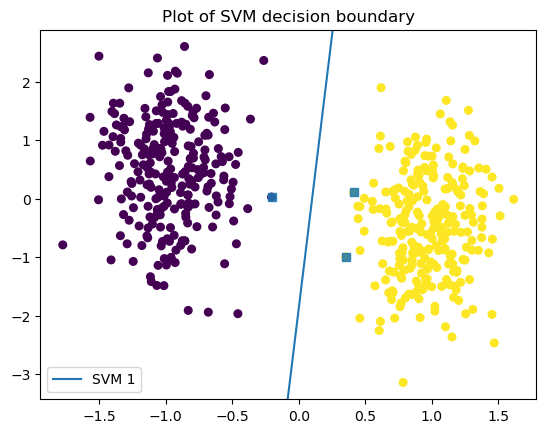

In [13]:
# -- let's actually plot the support vectors
plot_svm_boundaries(X, y, [model_svm_1], show_sv = True)

---

Now, let's try to play a bit with the support vectors, in order to see how the svm model is going to behave.

For instance, let's try to move one of the above support vectors.

In [14]:
# -- print the indices of support vectors (attribute support)
print(model_svm_1.support_)
# -- for example, let's move the point indexed by 321, that is
X[321]

[321 109 417]


array([-0.20498378,  0.02693208])

Now let's move one support vector closer to the points in the same class.

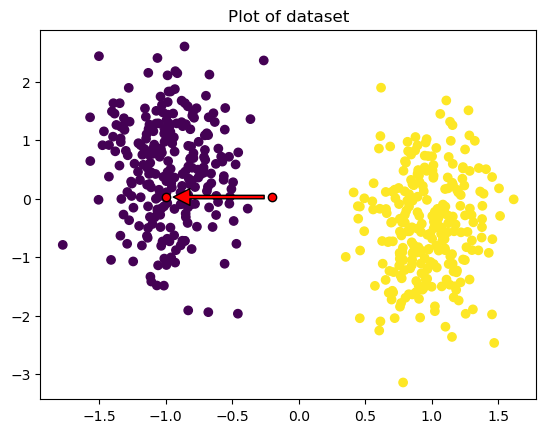

In [15]:
# -- let's copy the data and move one support vector close to the points in the same class
# -- TO COMPLETE
X1 = X.copy()
# the suppport vector indexed by 321 goes from x coordinate ~ -0.2 x coordinate -1
X1[321, 0] = -1

# -- let's plot the new dataset
plt.title("Plot of dataset")
plt.scatter(X1[:, 0], X1[:, 1], c=y)

# -- see the movement of the support vector (then comment to see the whole actual dataset)
plt.scatter(X[321, 0], X[321, 1], color = 'red', edgecolor='k')
plt.scatter(X1[321, 0], X1[321, 1], color = 'red', edgecolor='k')
plt.annotate('', xytext=(X[321, 0], X[321, 1]), xy=(X1[321, 0], X1[321, 1]),
            arrowprops=dict(facecolor='red', shrink=0.07, width=2.5));

Let's run the SVM on the new data.

In [16]:
model_svm_2 = svm.SVC(kernel="linear", C=1e5)

# -- Train the model
model_svm_2.fit(X1, y)

# -- Get the training error as 1 - score()
training_error = 1.0 - model_svm_2.score(X1, y)

# -- Print the training error
print("Training error: ", training_error)

Training error:  0.0


Plot the SVM decision boundary and the previous decision boundary.

In [17]:
# -- print the support vectors
print('Support Vectors:\n', model_svm_2.support_vectors_)

print('---')

# -- print dual coefficients
print('Dual Coefficients of Support Vectors:\n', model_svm_2.dual_coef_)

Support Vectors:
 [[-0.45836856 -1.96853588]
 [-0.2637712   2.36361175]
 [ 0.35281708 -0.99697609]]
---
Dual Coefficients of Support Vectors:
 [[-2.61226021 -0.79002101  3.40228122]]


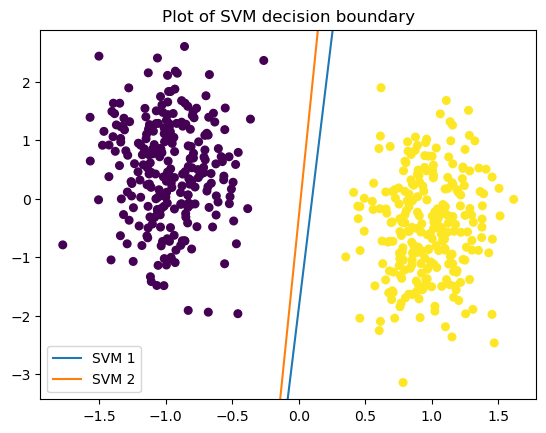

In [18]:
plot_svm_boundaries(X1, y, [model_svm_1, model_svm_2])

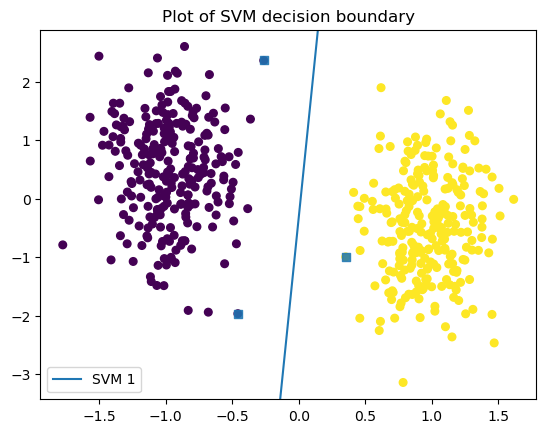

In [19]:
# -- let's actually plot the support vectors
plot_svm_boundaries(X1, y, [model_svm_2], show_sv = True)

---

Now let's move the same support vector to the right, i.e., closer to the points in the other class.

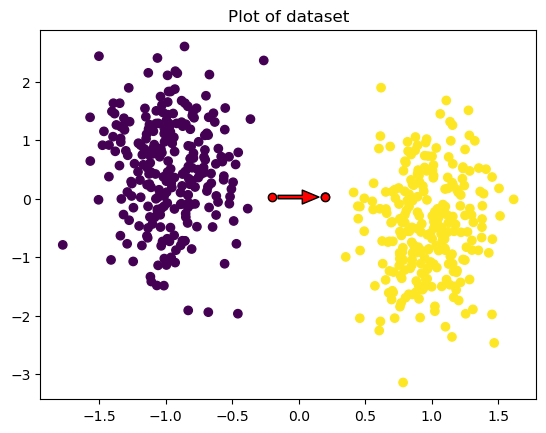

In [20]:
# -- let's copy the original data and move one support vector close to the points in the other class
# -- TO COMPLETE
X2 = X.copy()
X2[321, 0] = 0.2

# -- let's plot the new dataset
plt.title("Plot of dataset")
plt.scatter(X2[:, 0], X2[:, 1], c=y)

# -- see the movement of the support vector (then comment to see the whole actual dataset)
plt.scatter(X[321, 0], X[321, 1], color = 'red', edgecolor='k')
plt.scatter(X2[321, 0], X2[321, 1], color = 'red', edgecolor='k')
plt.annotate('', xytext=(X[321, 0], X[321, 1]), xy=(X2[321, 0], X2[321, 1]),
            arrowprops=dict(facecolor='red', shrink=0.12, width=2.5, headwidth=10.0));

Let's run the SVM on the new data.

In [21]:
model_svm_3 = svm.SVC(kernel="linear", C=1e5)

# -- Train the model
model_svm_3.fit(X2, y)

# -- Get the training error as 1 - score()
training_error = 1.0 - model_svm_3.score(X2, y)

# -- Print the training error
print("Training error: ", training_error)

Training error:  0.0


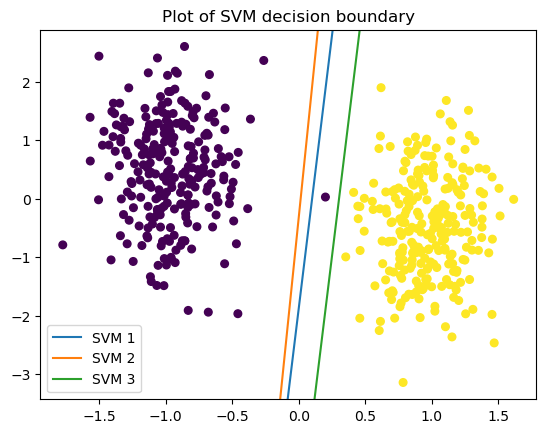

In [22]:
plot_svm_boundaries(X2, y, [model_svm_1, model_svm_2, model_svm_3])

Let's plot the new decision boundary, and the old ones too.

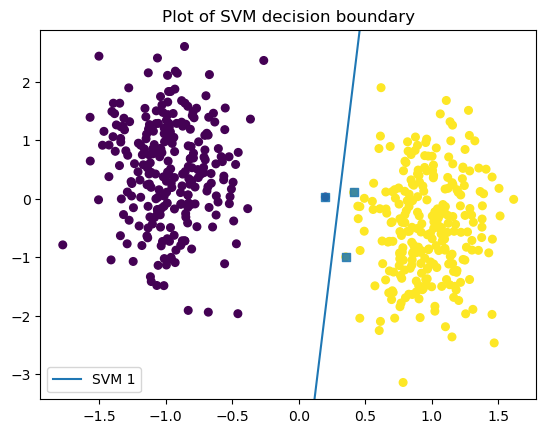

In [23]:
# -- let's actually plot the support vectors
plot_svm_boundaries(X2, y, [model_svm_3], show_sv = True)

In [24]:
# -- print the support vectors
print('Support Vectors:\n', model_svm_3.support_vectors_)

print('---')

# -- print dual coefficients
print('Dual Coefficients of Support Vectors:\n', model_svm_3.dual_coef_)

Support Vectors:
 [[ 0.2         0.02693208]
 [ 0.35281708 -0.99697609]
 [ 0.41207829  0.10634759]]
---
Dual Coefficients of Support Vectors:
 [[-46.42824463   3.81081395  42.61743068]]


In [25]:
# -- TO COMPLETE: plot svm boundaries with support vectors for comparison

## SVM for non-linearly separable data

Let's make a dataset that is not linearly separble, and let's plot it.

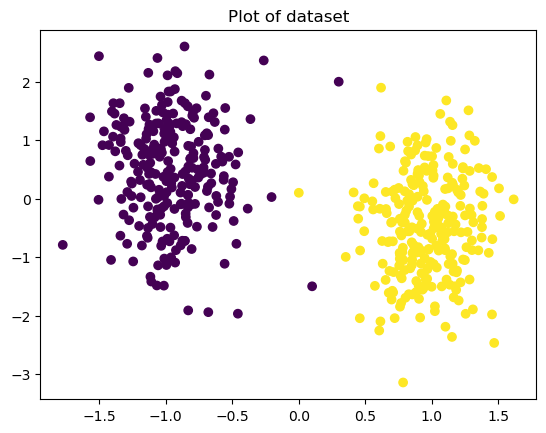

In [26]:
X_nls, y_nls = datasets.make_blobs(n_samples = 500, centers = 2, n_features = 2, random_state = ID_number)

scaler.fit(X_nls)
X_nls = scaler.transform(X_nls)

# -- let's manually create a nls dataset
a = np.array([[0.3, 2]])
b = np.array([0])
X_nls = np.concatenate((X_nls, a))
y_nls = np.concatenate((y_nls, b))
a = np.array([[0.1, -1.5]])
b = np.array([0])
X_nls = np.concatenate((X_nls, a))
y_nls = np.concatenate((y_nls, b))

a = np.array([[0, 0.1]])
b = np.array([1])
X_nls = np.concatenate((X_nls, a))
y_nls = np.concatenate((y_nls, b))

plt.title("Plot of dataset")
plt.scatter(X_nls[:, 0], X_nls[:, 1], c=y_nls);

Let's try to learn a hard-SVM. It means that the parameter C, which is approximately equal to $1/\lambda$ with $\lambda$ as in our slides.

In [27]:
# -- Creating a HARD SVM model
model_hard_svm_1 = svm.SVC(kernel="linear", C=1e5)

# -- Train the model
model_hard_svm_1.fit(X_nls, y_nls)

# -- Get the training error as 1 - score()
training_error = 1.0 - model_hard_svm_1.score(X_nls, y_nls)

# -- Print the training error 
print("Training error: ", training_error)

Training error:  0.003976143141153132


The following code plots the decision boundary, as well as the margin.

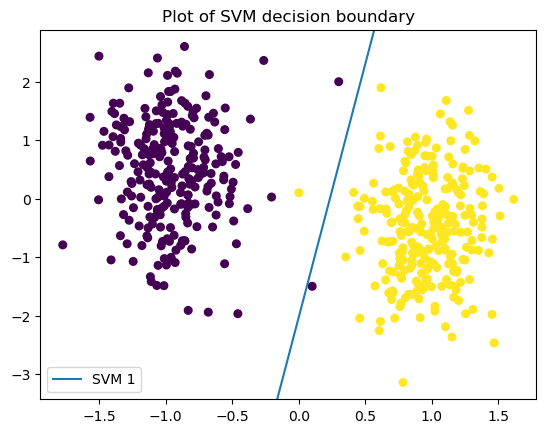

In [28]:
# -- Plot of hard SVM decision boundary
plot_svm_boundaries(X_nls, y_nls, [model_hard_svm_1])

In [29]:
# -- print the support vectors
print('Support Vectors:\n', model_hard_svm_1.support_vectors_)

print('---')

# -- print dual coefficients
print('Dual Coefficients of Support Vectors:\n', model_hard_svm_1.dual_coef_)

Support Vectors:
 [[ 0.3         2.        ]
 [ 0.1        -1.5       ]
 [ 0.61835045  1.89793698]
 [ 0.41207829  0.10634759]
 [ 0.          0.1       ]]
---
Dual Coefficients of Support Vectors:
 [[ -86117.4283706  -100000.            1716.78890758   84400.63946302
   100000.        ]]


Let's try with a smaller value of C ($10^4$), that corresponds to larger value of $\lambda$.

What do you expect?

In [30]:
# -- Creating a soft SVM model
model_hard_svm_2 = svm.SVC(kernel="linear", C=1e4)

# -- Train the model
model_hard_svm_2.fit(X_nls, y_nls)

# -- Get the training error as 1 - score()
training_error = 1.0 - model_hard_svm_2.score(X_nls, y_nls)

# -- Print the training error 
print("Training error: ", training_error)

Training error:  0.003976143141153132


What about the decision boundary and the margin?

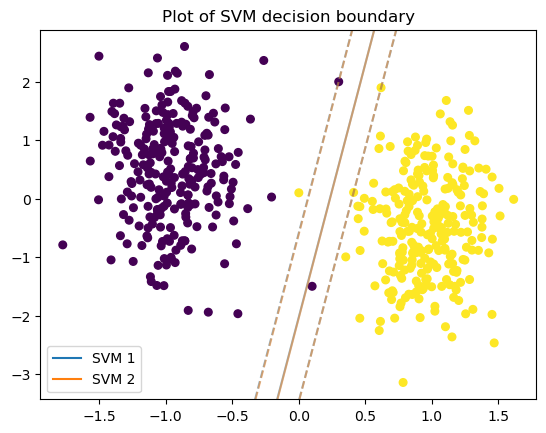

In [31]:
# -- TO COMPLETE: Plot of soft SVM decision boundary
plot_svm_boundaries(X_nls, y_nls, [model_hard_svm_1, model_hard_svm_2], show_margin=True)

In [32]:
# -- TO COMPLETE: L et's see now what the support vectors and dual coefficients are

In [33]:
# -- print the support vectors
print('Support Vectors:\n', model_hard_svm_1.support_vectors_)

print('---')

# -- print dual coefficients
print('Dual Coefficients of Support Vectors:\n', model_hard_svm_1.dual_coef_)

Support Vectors:
 [[ 0.3         2.        ]
 [ 0.1        -1.5       ]
 [ 0.61835045  1.89793698]
 [ 0.41207829  0.10634759]
 [ 0.          0.1       ]]
---
Dual Coefficients of Support Vectors:
 [[ -86117.4283706  -100000.            1716.78890758   84400.63946302
   100000.        ]]


Let's repeat everything for an even smaller C, i.e., C = 100

In [34]:
# -- Creating a soft SVM model
model_soft_svm_3 = svm.SVC(kernel="linear", C=100)

# -- Train the model
model_soft_svm_3.fit(X_nls, y_nls)

# -- Get the training error as 1 - score()
training_error = 1.0 - model_soft_svm_3.score(X_nls, y_nls)

# -- Print the training error (seems to be exactly the same as before)
print("Training error: ", training_error)

Training error:  0.003976143141153132


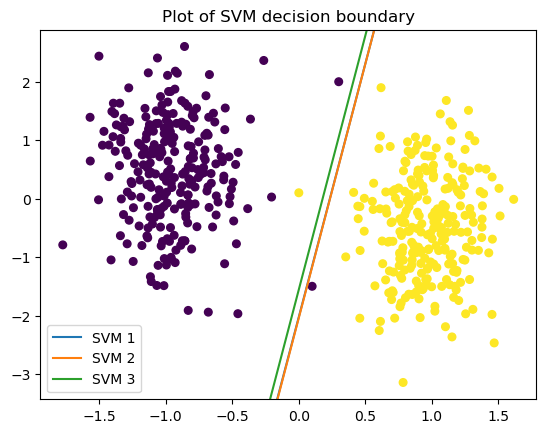

In [35]:
# -- TO COMPLETE: Plot of soft SVM decision boundary
plot_svm_boundaries(X_nls, y_nls, [model_hard_svm_1, model_hard_svm_2, model_soft_svm_3])

What about setting C = 1?

In [36]:
# -- Creating a soft SVM model 
model_soft_svm_4 = svm.SVC(kernel="linear", C=1)

# -- Train the model
model_soft_svm_4.fit(X_nls, y_nls)

# -- Get the training error as 1 - score()
training_error = 1.0 - model_soft_svm_4.score(X_nls, y_nls)

# -- Print the training error (corresponds to 3 misclassified points)
print("Training error: ", training_error)

Training error:  0.005964214711729587


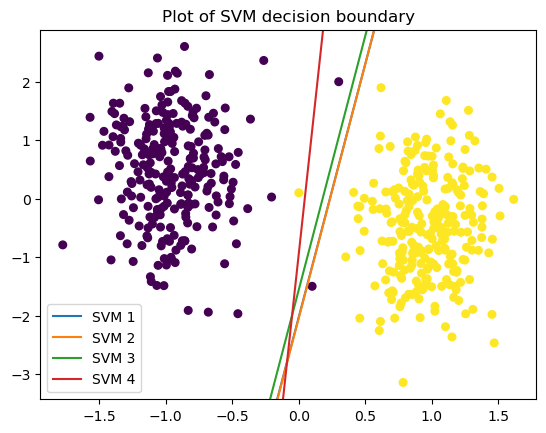

In [37]:
# -- TO COMPLETE: Plot of soft SVM decision boundary
plot_svm_boundaries(X_nls, y_nls, [model_hard_svm_1, model_hard_svm_2, model_soft_svm_3, model_soft_svm_4])

Let's see what are the support vectors.

In [38]:
# -- print the support vectors
print('Support Vectors:\n', model_hard_svm_1.support_vectors_)

print('---')

# -- print dual coefficients
print('Dual Coefficients of Support Vectors:\n', model_hard_svm_1.dual_coef_)

Support Vectors:
 [[ 0.3         2.        ]
 [ 0.1        -1.5       ]
 [ 0.61835045  1.89793698]
 [ 0.41207829  0.10634759]
 [ 0.          0.1       ]]
---
Dual Coefficients of Support Vectors:
 [[ -86117.4283706  -100000.            1716.78890758   84400.63946302
   100000.        ]]


### Comparison with Perceptron

Just for comparison, let's run the perceptron on the same dataset with various initial random states

Let's plot the decision boundary.

In [39]:
# -- TO COMPLETE: fit some perceptron models
model_perceptron_1 = linear_model.Perceptron(random_state=ID_number)
model_perceptron_1.fit(X_nls, y_nls)
training_error = 1.0 - model_perceptron_1.score(X_nls, y_nls)
print("Training error: ", training_error)
# -- plot perceptron boundaries

Training error:  0.003976143141153132


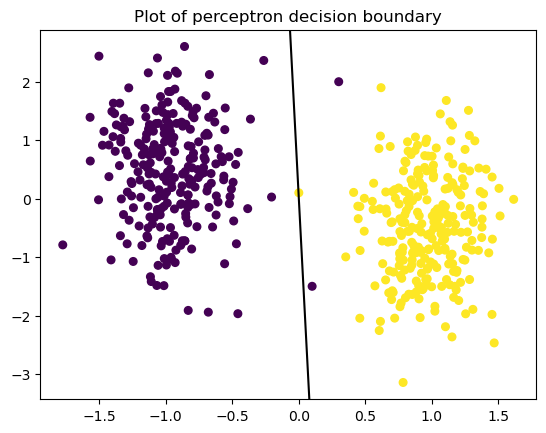

In [40]:
# -- Plot of perceptron decision boundary
plot_perceptron_boundaries(X_nls, y_nls, model_perceptron_1)

### K-Fold Cross Validation

Now, let's try to select the best SVM model using $k$-fold cross validation, with respect to the parameter $C$.

More specifically, let's fix a non-linearly separable dataset. You need to perform train-validation-test split, fix a grid for the hyperparameter $C$, and perform model selection by running $k$-fold cross validations (let's say $k = 5$, but you can try to change).

At the end, we would like to collect the best models, in terms of generalization error, achieved by you. 

In [41]:
# -- generate the dataset (non linearly separable data)
X, Y = datasets.make_blobs(n_samples = 1000, centers = 2, n_features = 2, 
                            center_box=(-7.5, 7.5), random_state = 37, cluster_std = 2.8)

# -- divide in: train = 2/3, val = test = 1/6

# -- TO COMPLETE (from now on)
# -- perform train-val-test split
# -- fix k of k-fold = 5 (for example)

m = X.shape[0]
m_train = int(2/3 * m)
m_val = int((m - m_train)/2)
m_test = m - m_train - m_val

# -- print sizes
print("Total ammount of data", m)
print("Amount of data for training and deciding parameters:", m_train)
print("Amount of data for validation (choosing among different models):", m_val)
print("Amount of data for test:", m_test)

### Split the data in Training set, Validation set and Test set.
from sklearn.model_selection import train_test_split

# Split into train and test set.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = m_test, random_state = ID_number)

# Scale the data.
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Kfold model selection.
from sklearn.model_selection import KFold

# Grid for C paramter.
c_grid = np.logspace(0, 2, num=30) # Grid for C parameter.
#print(c_grid)

num_folds = 5

kf = KFold(n_splits = num_folds)

err_validation_kfold = np.zeros(len(c_grid),)
err_training_kfold = np.zeros(len(c_grid),)

for i, c in enumerate(c_grid):
    
    # -- 1) define a svm model using SVC() for the i-th value of c
    softSVM_kfold = svm.SVC(kernel="linear", C=c)

    print(f'#{i+1} Performing k-fold for C = {c}...')
    
    for train_index, validation_index in kf.split(X_train):
        X_train_kfold, X_val_kfold = X_train_scaled[train_index], X_train_scaled[validation_index]
        Y_train_kfold, Y_val_kfold =  Y_train[train_index], Y_train[validation_index]
        
        # -- data scaling: standardize features with respect to the current folds
        scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
        X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
        X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
    
        # -- learn the model using the training data from the k-fold
        softSVM_kfold.fit(X_train_kfold_scaled, Y_train_kfold)
        
        # -- incremental mean
        err_training_kfold[i] += (1.0 - softSVM_kfold.score(X_train_kfold, Y_train_kfold))
        err_validation_kfold[i] += (1.0 - softSVM_kfold.score(X_val_kfold_scaled, Y_val_kfold))


# -- compute the mean => estimate of validation losses and errors for each C
err_training_kfold /= num_folds
err_validation_kfold /= num_folds

# -- choose the C parameter that minimizes the (the estimation of the true) loss
c_opt = c_grid[np.argmin(err_validation_kfold)]

print()
print('Best value of C paramteter:', c_opt)
print('Min (1 - R²) ', np.min(err_validation_kfold))

Total ammount of data 1000
Amount of data for training and deciding parameters: 666
Amount of data for validation (choosing among different models): 167
Amount of data for test: 167
#1 Performing k-fold for C = 1.0...
#2 Performing k-fold for C = 1.1721022975334803...
#3 Performing k-fold for C = 1.3738237958832629...
#4 Performing k-fold for C = 1.6102620275609394...
#5 Performing k-fold for C = 1.8873918221350972...
#6 Performing k-fold for C = 2.2122162910704493...
#7 Performing k-fold for C = 2.592943797404667...
#8 Performing k-fold for C = 3.039195382313197...
#9 Performing k-fold for C = 3.562247890262442...
#10 Performing k-fold for C = 4.1753189365604015...
#11 Performing k-fold for C = 4.893900918477494...
#12 Performing k-fold for C = 5.736152510448679...
#13 Performing k-fold for C = 6.7233575364993365...
#14 Performing k-fold for C = 7.880462815669913...
#15 Performing k-fold for C = 9.23670857187386...
#16 Performing k-fold for C = 10.826367338740546...
#17 Performing k-f

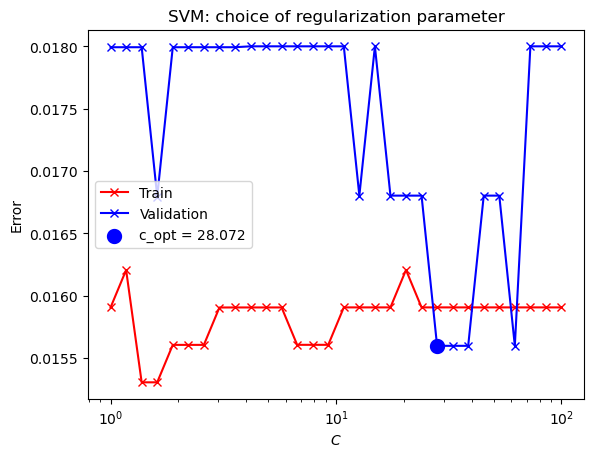

In [42]:
# let's plot the error as a function of the C parameter
plt.xscale('log')
plt.plot(c_grid, err_training_kfold, color='r', marker='x', label="Train")
plt.plot(c_grid, err_validation_kfold, color='b', marker='x', label="Validation")
# -- highlight min loss
plt.scatter(c_opt, np.min(err_validation_kfold), color='b', marker='o', linewidths=5, label=f"c_opt = {round(c_opt, 3)}")
plt.legend()
plt.xlabel(r'$C$')
plt.ylabel('Error')
plt.title('SVM: choice of regularization parameter')
plt.show()

Training error = 0.015606242496998823


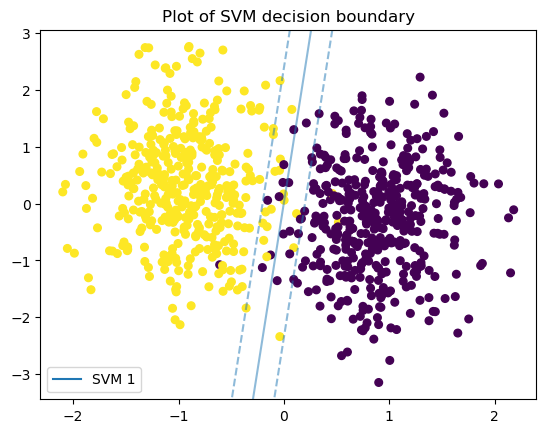

In [43]:
# Now we retrain the model using all the training data.
softSVM = svm.SVC(kernel="linear", C=c_opt)
softSVM.fit(X_train_scaled, Y_train)

training_error = 1.0 - softSVM.score(X_train_scaled, Y_train)
print("Training error =", training_error)

# Plot the results on the training set.
plot_svm_boundaries(X_train_scaled, Y_train, [softSVM], show_margin=True)

Generalization error = 0.029940119760479056


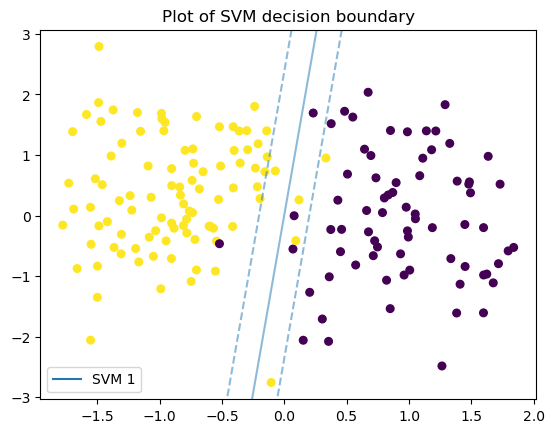

In [44]:
# Compute the generalization error
generalization_err = 1.0 - softSVM.score(X_test_scaled, Y_test)
print("Generalization error =", generalization_err)

# Plot the results on the test set.
plot_svm_boundaries(X_test_scaled, Y_test, [softSVM], show_margin=True)

### Comparison with Perceptron

Finally, let's compare the best model obtained above with some perceptrons. 

Training error = 0.02400960384153661


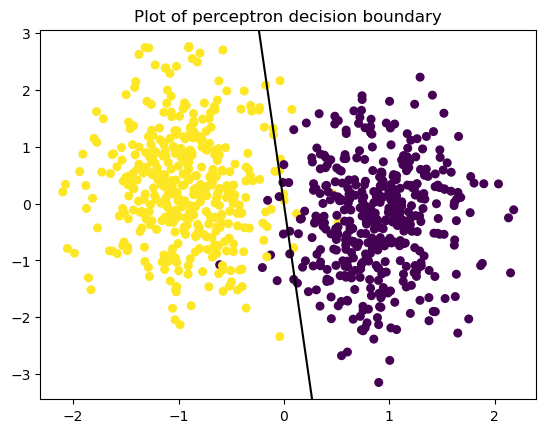

In [45]:
# Train the model using the peceptron.
perceptron_1 = Perceptron(random_state=ID_number * 11212 , tol=1e-3)
perceptron_1.fit(X_train_scaled, Y_train)

# Compute the training error.
training_error = 1.0 - perceptron_1.score(X_train_scaled, Y_train)
print("Training error =", training_error)

# Plot the boundaries.
plot_perceptron_boundaries(X_train_scaled, Y_train, perceptron_1)

Generalization error = 0.029940119760479056


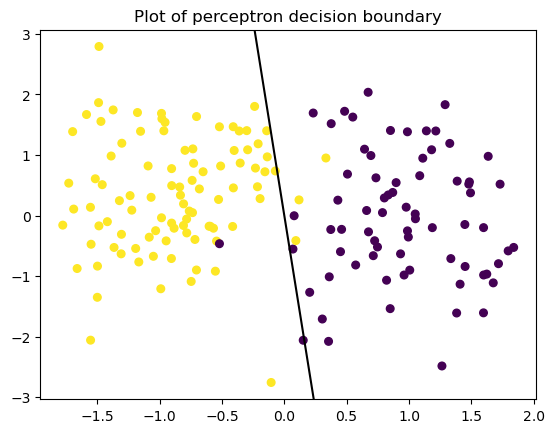

In [46]:
# Compute generalization error.
generalization_err = 1 - perceptron_1.score(X_test_scaled, Y_test)
print("Generalization error =", generalization_err)

# Print the results on the test set.
plot_perceptron_boundaries(X_test_scaled, Y_test, perceptron_1)